In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from sklearn.linear_model import LinearRegression

In [2]:
df_20 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/RbStats2020.csv")
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/RbStats2021.csv")

In [3]:
df_20 = df_20[df_20.G >= 12].reset_index(drop=True)
df_20.head()

,RANK,PLAYER,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Derrick Henry (TEN),378,"2,027",5.4,94,0,17,19,31,114,6.0,0,2,16,314.1,19.6,99.9%
1,2,Alvin Kamara (NO),187,932,5.0,49,0,16,83,107,756,9.1,5,0,15,294.8,19.7,99.9%
2,3,Dalvin Cook (MIN),312,"1,557",5.0,70,0,16,44,54,361,8.2,1,3,14,293.8,21.0,99.9%
3,4,Jonathan Taylor (IND),232,"1,169",5.0,62,0,11,36,40,299,8.3,1,1,15,216.8,14.5,100.0%
4,5,Aaron Jones (GB),201,"1,104",5.5,77,0,9,47,63,355,7.6,2,0,14,211.9,15.1,99.7%


In [4]:
df_21 = df_21[df_21.G >=12].reset_index(drop=True)
df_21.head()

,RANK,PLAYER,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,OWN
0,1,Jonathan Taylor (IND),332,"1,811",5.5,83,0,18,40,51,360,9.0,2,2,17,333.1,19.6,100.0%
1,2,Austin Ekeler (LAC),206,911,4.4,28,0,12,70,94,647,9.2,8,3,16,273.8,17.1,99.9%
2,3,Joe Mixon (CIN),292,"1,205",4.1,32,0,13,42,48,314,7.5,3,1,16,245.9,15.4,99.9%
3,4,Najee Harris (PIT),307,"1,200",3.9,37,0,7,74,94,467,6.3,3,0,17,226.7,13.3,99.9%
4,5,James Conner (ARI),202,752,3.7,35,0,15,37,39,375,10.1,3,0,15,220.7,14.7,98.6%


In [5]:
df_20.loc[0:50, 'FPTS/G'].corr(df_21.loc[0:50, 'FPTS/G'])

0.9272758635112078

In [6]:
x = df_20['FPTS/G'][0:50].values.reshape(-1,1)

y = df_21['FPTS/G'][0:50].values.reshape(-1,1)

reg = LinearRegression().fit(x,y)
reg.score(x,y)

0.8553984448943408

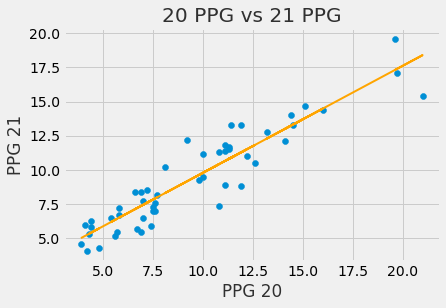

In [12]:
plt.figure()

plt.scatter(x=df_20.loc[0:50,'FPTS/G'], y = df_21.loc[0:50, 'FPTS/G'])

yhat = reg.coef_ * x + reg.intercept_
plt.plot(x, yhat, lw=2, c='orange')

plt.xlabel('PPG 20', alpha = .8)
plt.ylabel('PPG 21', alpha=0.8)
plt.title('20 PPG vs 21 PPG', alpha = 0.8)
plt.style.use('fivethirtyeight')


plt.show()

In [33]:
def predict_ppg(x):
    score = np.array([[x]])
    prediction = reg.predict(score)
    
    return prediction[0,0]


In [42]:
df_21 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/RbStats2021.csv")

In [52]:
df_22 = df_21.copy()
df_22 = df_22[['PLAYER', 'FPTS/G']]
df_22['FPTS/G 22'] = 0
df_22.head()

,PLAYER,FPTS/G,FPTS/G 22
0,Jonathan Taylor (IND),19.6,0
1,Austin Ekeler (LAC),17.1,0
2,Joe Mixon (CIN),15.4,0
3,Najee Harris (PIT),13.3,0
4,James Conner (ARI),14.7,0


In [56]:
df_22['FPTS/G 22'] = df_22.apply(lambda x: predict_ppg(x['FPTS/G']), axis = 1)
df_22['FPTS 22'] = np.round(df_22['FPTS/G 22'] * 17,2)
df_22.sort_values('FPTS 22', ascending=False, inplace=True)
df_22.reset_index(drop = True, inplace = True)
df_22.index = df_22.index + 1

In [57]:
df_22

,PLAYER,FPTS/G,FPTS/G 22,FPTS 22
1,Derrick Henry (TEN),21.9,19.095401,324.62
2,Jonathan Taylor (IND),19.6,17.296651,294.04
3,Austin Ekeler (LAC),17.1,15.341488,260.81
4,Joe Mixon (CIN),15.4,14.011978,238.20
5,James Conner (ARI),14.7,13.464532,228.90
...,...,...,...,...
281,Kenjon Barner (TB),0.0,1.968175,33.46
282,Brennan Clay (DEN),0.0,1.968175,33.46
283,Nate McCrary (BAL),-0.1,1.889969,32.13
284,Khari Blasingame (CHI),-0.2,1.811762,30.80


In [58]:
df_22.to_csv('rb_rankings.csv')